<a href="https://colab.research.google.com/github/SangamSilwal/Machine-learning-Series/blob/main/Gradient_Boost__Step_By_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(42)
X = np.random.rand(100,1) -0.5
y = 3*X[:,0]**2 + 0.05*np.random.randn(100)

In [3]:
df = pd.DataFrame()

In [4]:
df['X'] = X.reshape(100)
df['y'] = y

In [5]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'X vs y')

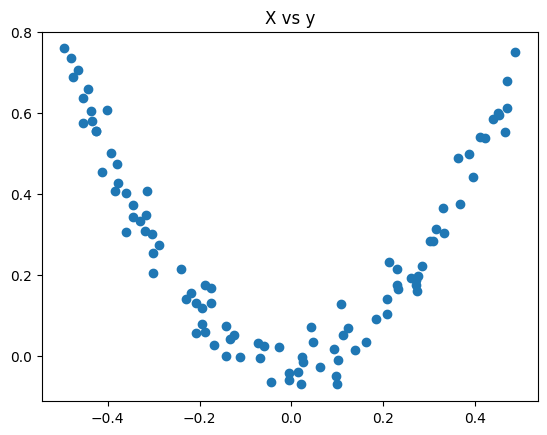

In [6]:
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [7]:
# In the Gradient Boosting the first model prediction is always the mean
df['pred1'] = df['y'].mean()
df.head()

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458


In [8]:
# The loss function in the gradient Boosting is the residual
df['res1'] = df['y'] - df['pred1']

In [10]:
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


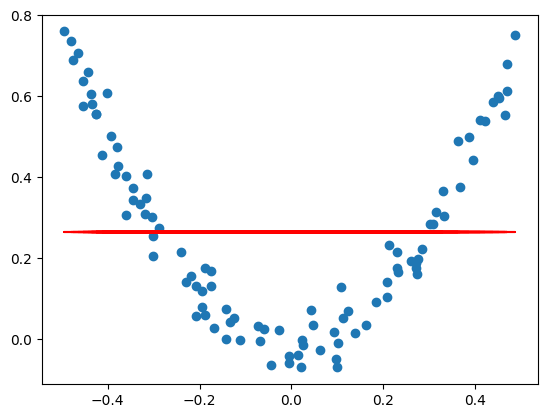

In [11]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

In [12]:
from sklearn.tree import DecisionTreeRegressor
tree1= DecisionTreeRegressor(max_leaf_nodes  = 8)

In [15]:
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


In [16]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

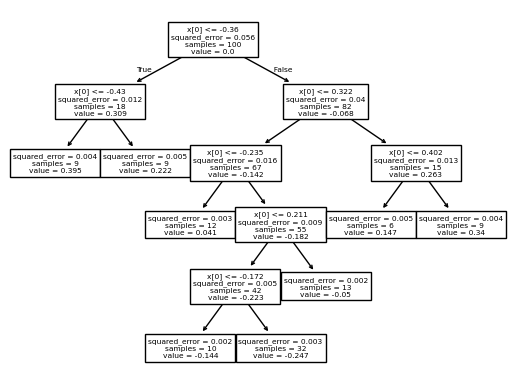

In [17]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [18]:
# Generating X_test
X_test = np.linspace(-0.5,0.5,500)
y_pred = 0.265458 + tree1.predict(X_test.reshape(500,1))

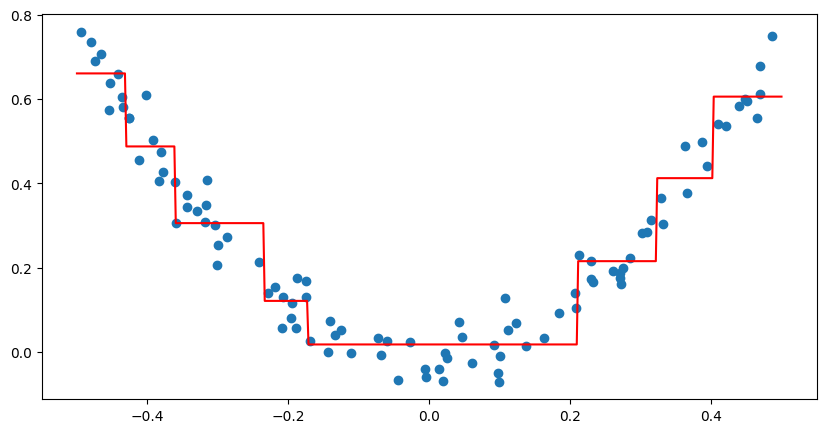

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(df['X'],df['y'])
plt.plot(X_test,y_pred,color='r')

In [22]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))

In [23]:
df

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [24]:
df['res2'] = df['y'] - df['pred2']
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


In [25]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [28]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(500,1)) for regressor in (tree1,tree2))
# We basically put the learning Rate to 1 here

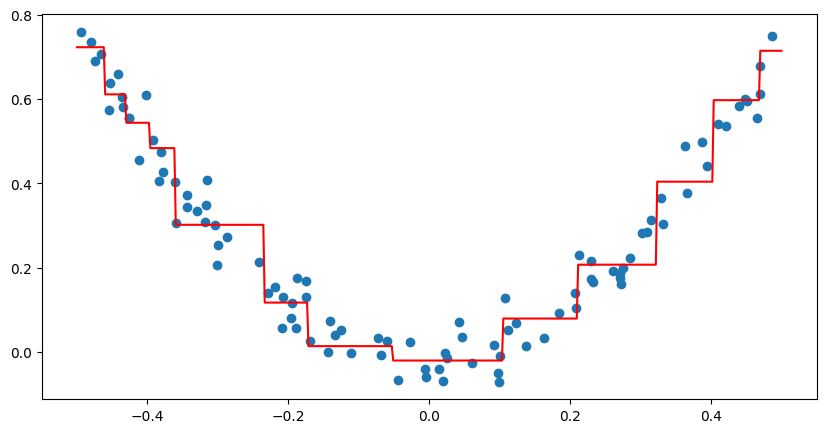

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(df['X'],df['y'])
plt.plot(X_test,y_pred,color='r')

In [42]:
df['pred3'] = 0.265458 + sum(regressor.predict(df['X'].values.reshape(100,1)) for regressor in (tree1,tree2))
df['res3'] = df['y'] - df['pred3']
df

,X,y,pred1,res1,pred2,res2,pred3,res3
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254,0.014321,0.037252
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404,0.597523,-0.003043
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732,0.207423,-0.041371
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497,-0.019811,-0.050367
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022,0.301966,0.042020
...,...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994,-0.019811,-0.020864
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624,-0.019811,0.017506
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489,0.014321,0.018488
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604,0.722987,-0.033472


In [43]:
tree4 = DecisionTreeRegressor(max_leaf_nodes=8)
tree4.fit(df['X'].values.reshape(100,1),df['res3'])

DecisionTreeRegressor(max_leaf_nodes=8)

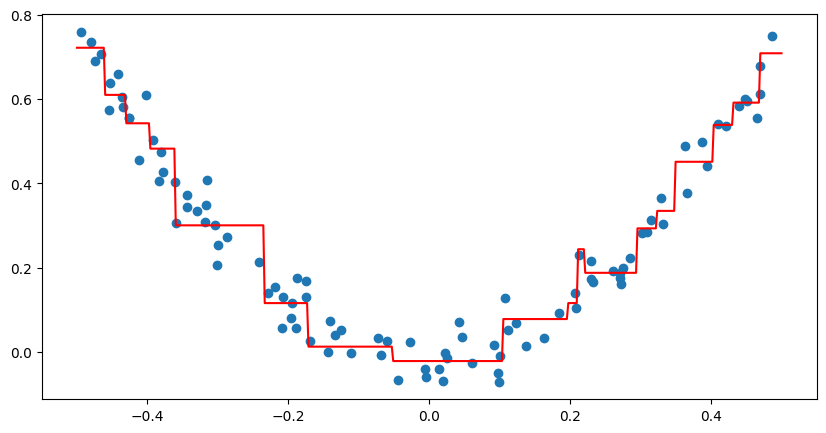

In [44]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(500,1)) for regressor in (tree1,tree2,tree4))
plt.figure(figsize=(10,5))
plt.scatter(df['X'],df['y'])
plt.plot(X_test,y_pred,color='r')

# Gradient Boosting using Recursion

In [30]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

20


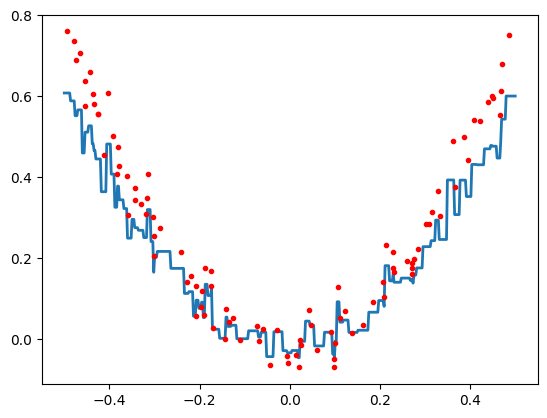

19


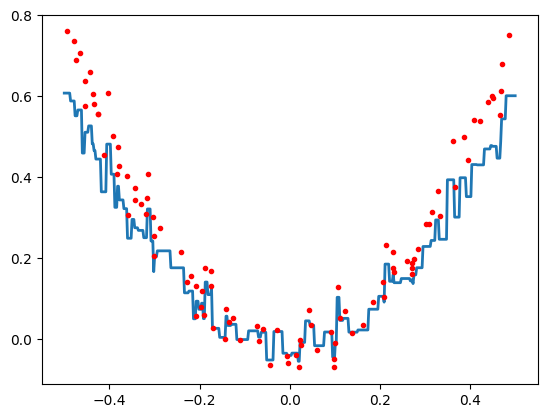

18


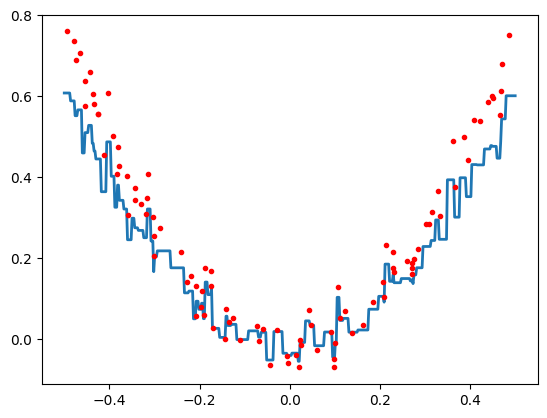

17


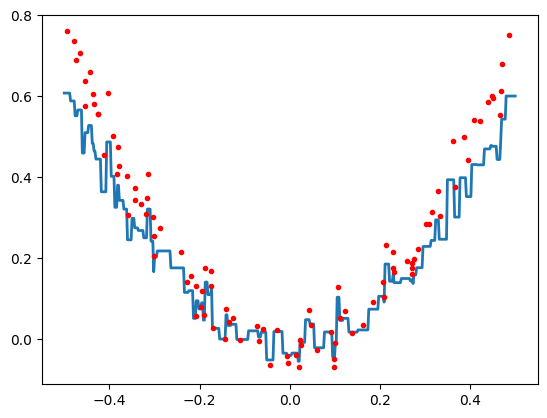

16


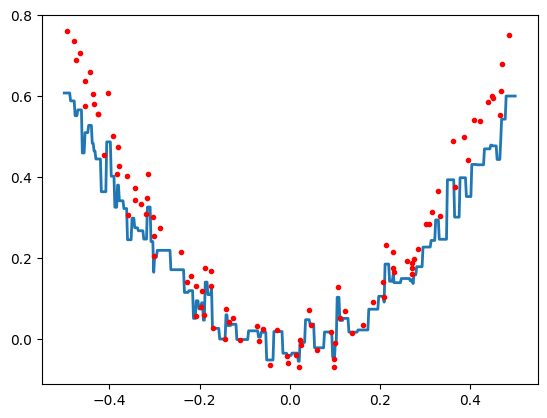

15


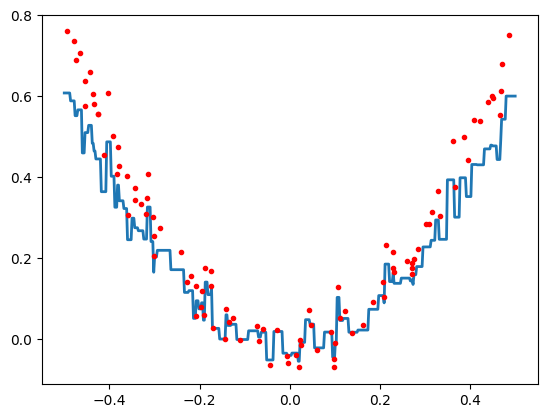

14


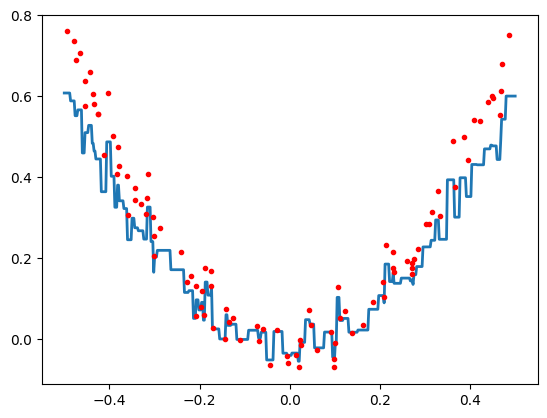

13


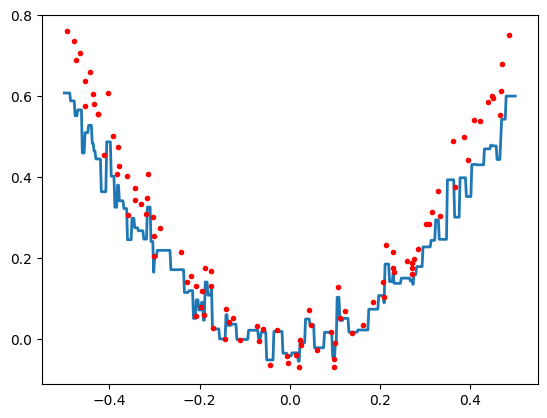

12


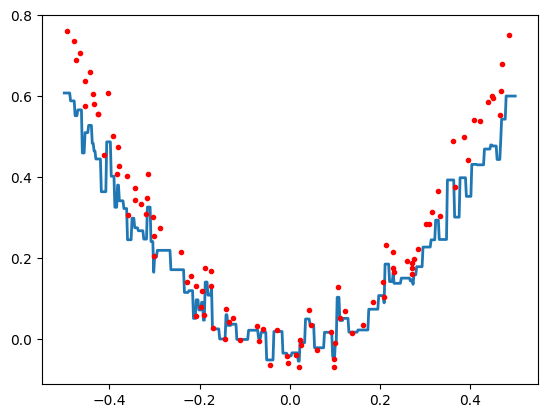

11


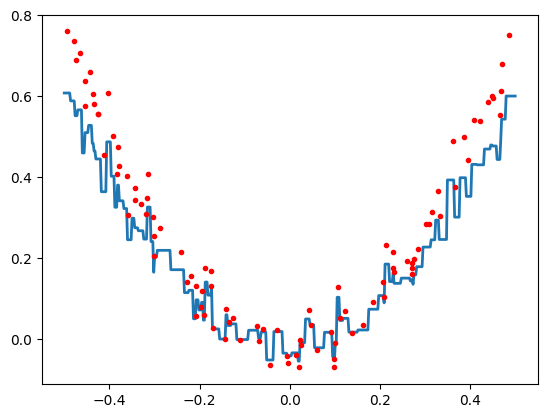

10


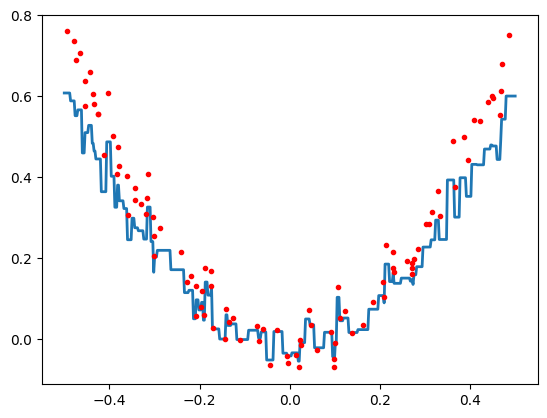

9


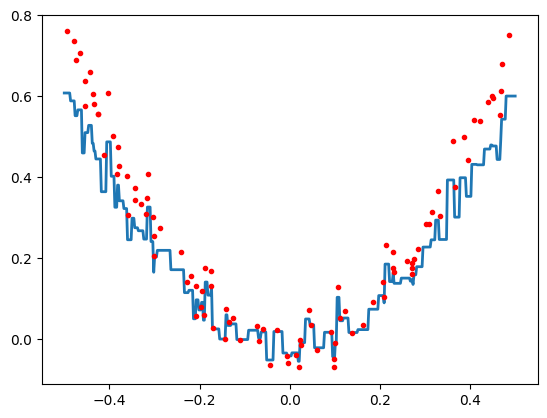

8


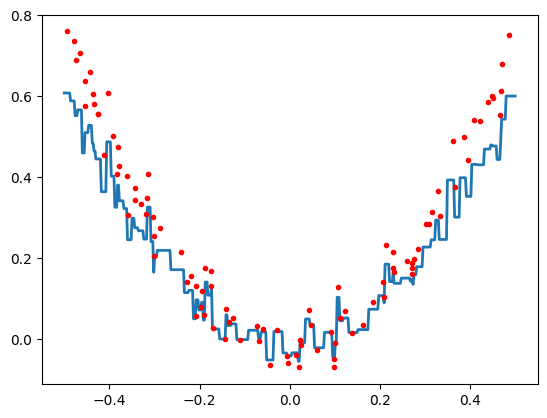

7


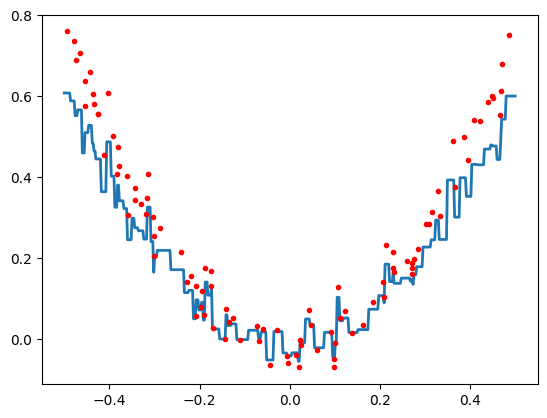

6


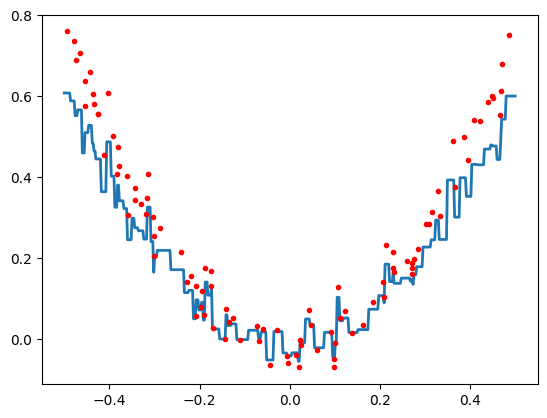

5


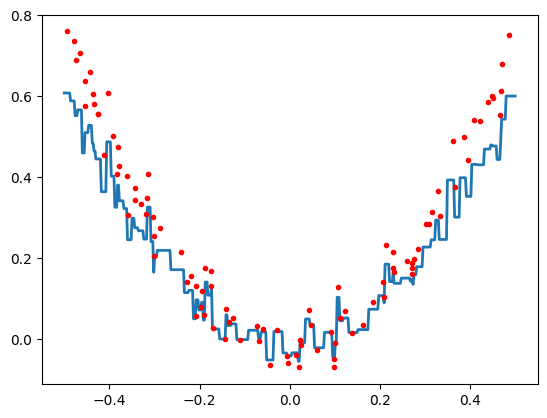

4


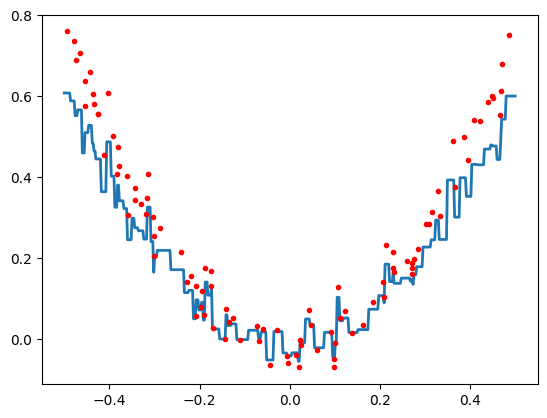

3


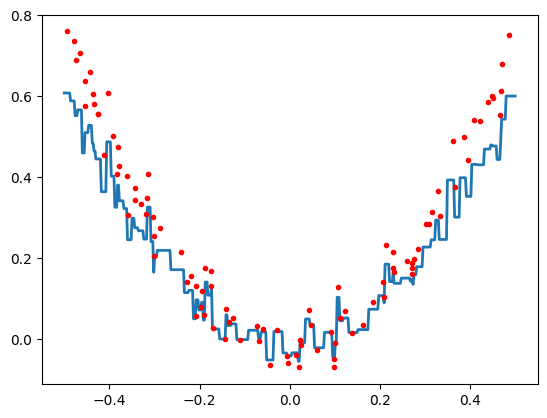

2


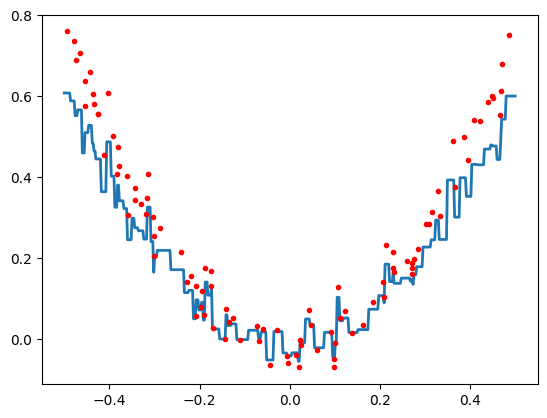

1


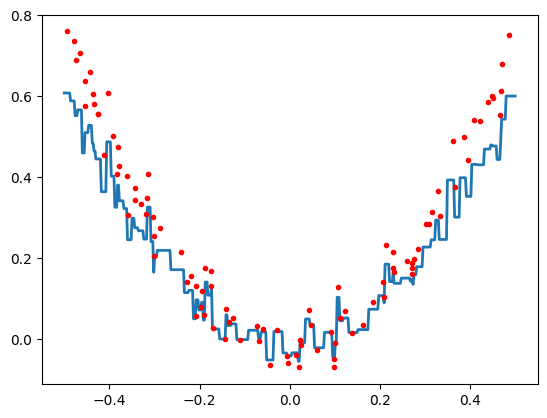

In [38]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,20,lr=0.1)